In [172]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else :
    plt.rc("font", family="Malgun Gothic")

In [173]:
df = pd.read_csv("C://Users/zihyu/Desktop/새 폴더 (4)/최종3.csv", encoding = 'cp949')

df['em_t_band'] = 0

In [174]:
max(df.em_t)

300.54

In [175]:
df['em_t_band'] = pd.cut(df['em_t'], bins = [0, 80, 300.55], labels=['안전','위험'])

In [176]:
df

,em_t,base_month,emd_nm,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,d_visit_pop_cnt,l_visit_pop_cnt,s_visit_pop_cnt,pre_mm,em_t_band
0,43.58,1,건입동,2.53,30,9394.50,246.25,25742.09,819.21,515.95,85.3,안전
1,11.55,1,구좌읍,185.93,104,15552.25,600.75,27391.16,739.62,256.40,59.8,안전
2,53.27,1,남원읍,188.71,51,18941.00,720.75,30383.79,1325.47,785.10,69.9,안전
3,251.83,1,노형동,45.21,161,54146.00,2079.50,80644.43,2537.05,1758.83,79.2,위험
4,52.89,1,대륜동,22.24,36,14229.75,199.75,33917.93,704.69,243.59,70.8,안전
...,...,...,...,...,...,...,...,...,...,...,...,...
453,23.30,12,표선면,135.16,47,12327.67,418.00,15578.40,425.34,347.10,64.4,안전
454,7.56,12,한경면,79.10,70,9051.67,373.00,8687.56,413.23,80.90,51.4,안전
455,32.50,12,한림읍,91.09,110,21307.67,3589.67,22104.18,1549.58,362.10,60.7,안전
456,113.14,12,화북동,8.29,74,24765.33,395.00,27358.73,250.39,35.78,58.0,위험


In [177]:
df.to_csv("C://Users/zihyu/Desktop/새 폴더 (4)/최종4.csv", encoding = 'cp949')

In [178]:
df['em_t_band'].value_counts()

안전    361
위험     97
Name: em_t_band, dtype: int64

In [179]:
df['base_month'] = df['base_month'].astype(str)

In [180]:
df.dtypes

em_t                float64
base_month           object
emd_nm               object
area                float64
em_area_cd_cnt        int64
resid_reg_pop       float64
foreign_pop         float64
d_visit_pop_cnt     float64
l_visit_pop_cnt     float64
s_visit_pop_cnt     float64
pre_mm              float64
em_t_band          category
dtype: object

In [181]:
df.corr()

,em_t,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,d_visit_pop_cnt,l_visit_pop_cnt,s_visit_pop_cnt,pre_mm
em_t,1.000000,-0.167066,0.558914,0.862085,0.311698,0.655553,0.268326,0.124214,0.050417
area,-0.167066,1.000000,0.525498,0.237657,0.385175,0.307435,0.537793,0.184784,-0.012903
em_area_cd_cnt,0.558914,0.525498,1.000000,0.856496,0.616490,0.792976,0.662564,0.254224,-0.039052
resid_reg_pop,0.862085,0.237657,0.856496,1.000000,0.520097,0.816368,0.510233,0.204753,0.007951
foreign_pop,0.311698,0.385175,0.616490,0.520097,1.000000,0.448115,0.737066,0.196079,-0.019199
d_visit_pop_cnt,0.655553,0.307435,0.792976,0.816368,0.448115,1.000000,0.642313,0.425863,-0.061859
l_visit_pop_cnt,0.268326,0.537793,0.662564,0.510233,0.737066,0.642313,1.000000,0.474166,-0.059898
s_visit_pop_cnt,0.124214,0.184784,0.254224,0.204753,0.196079,0.425863,0.474166,1.000000,0.011487
pre_mm,0.050417,-0.012903,-0.039052,0.007951,-0.019199,-0.061859,-0.059898,0.011487,1.000000


In [182]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

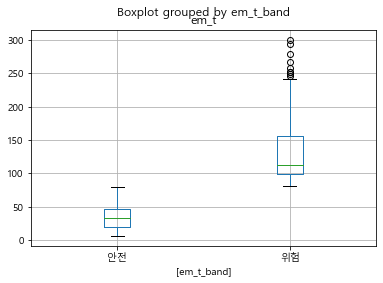

In [183]:
df.boxplot(column=['em_t'], by=['em_t_band'])

In [184]:
df_1 = pd.get_dummies(df, columns = ['emd_nm'])

In [185]:
df_1 = pd.get_dummies(df_1, columns = ['em_t_band'])

In [186]:
df_1 = pd.get_dummies(df_1, columns = ['base_month'])

In [187]:
df_1

,em_t,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,d_visit_pop_cnt,l_visit_pop_cnt,s_visit_pop_cnt,pre_mm,emd_nm_건입동,...,base_month_11,base_month_12,base_month_2,base_month_3,base_month_4,base_month_5,base_month_6,base_month_7,base_month_8,base_month_9
0,43.58,2.53,30,9394.50,246.25,25742.09,819.21,515.95,85.3,1,...,0,0,0,0,0,0,0,0,0,0
1,11.55,185.93,104,15552.25,600.75,27391.16,739.62,256.40,59.8,0,...,0,0,0,0,0,0,0,0,0,0
2,53.27,188.71,51,18941.00,720.75,30383.79,1325.47,785.10,69.9,0,...,0,0,0,0,0,0,0,0,0,0
3,251.83,45.21,161,54146.00,2079.50,80644.43,2537.05,1758.83,79.2,0,...,0,0,0,0,0,0,0,0,0,0
4,52.89,22.24,36,14229.75,199.75,33917.93,704.69,243.59,70.8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,23.30,135.16,47,12327.67,418.00,15578.40,425.34,347.10,64.4,0,...,0,1,0,0,0,0,0,0,0,0
454,7.56,79.10,70,9051.67,373.00,8687.56,413.23,80.90,51.4,0,...,0,1,0,0,0,0,0,0,0,0
455,32.50,91.09,110,21307.67,3589.67,22104.18,1549.58,362.10,60.7,0,...,0,1,0,0,0,0,0,0,0,0
456,113.14,8.29,74,24765.33,395.00,27358.73,250.39,35.78,58.0,0,...,0,1,0,0,0,0,0,0,0,0


In [188]:
df_1.columns

Index(['em_t', 'area', 'em_area_cd_cnt', 'resid_reg_pop', 'foreign_pop',
       'd_visit_pop_cnt', 'l_visit_pop_cnt', 's_visit_pop_cnt', 'pre_mm',
       'emd_nm_건입동', 'emd_nm_구좌읍', 'emd_nm_남원읍', 'emd_nm_노형동', 'emd_nm_대륜동',
       'emd_nm_대정읍', 'emd_nm_대천동', 'emd_nm_도두동', 'emd_nm_동홍동', 'emd_nm_봉개동',
       'emd_nm_삼도1동', 'emd_nm_삼도2동', 'emd_nm_삼양동', 'emd_nm_서홍동', 'emd_nm_성산읍',
       'emd_nm_송산동', 'emd_nm_아라동', 'emd_nm_안덕면', 'emd_nm_애월읍', 'emd_nm_영천동',
       'emd_nm_예래동', 'emd_nm_오라동', 'emd_nm_외도동', 'emd_nm_용담1동', 'emd_nm_용담2동',
       'emd_nm_이도1동', 'emd_nm_이도2동', 'emd_nm_이호동', 'emd_nm_일도1동',
       'emd_nm_일도2동', 'emd_nm_정방동', 'emd_nm_조천읍', 'emd_nm_중문동', 'emd_nm_중앙동',
       'emd_nm_천지동', 'emd_nm_표선면', 'emd_nm_한경면', 'emd_nm_한림읍', 'emd_nm_화북동',
       'emd_nm_효돈동', 'em_t_band_안전', 'em_t_band_위험', 'base_month_1',
       'base_month_10', 'base_month_11', 'base_month_12', 'base_month_2',
       'base_month_3', 'base_month_4', 'base_month_5', 'base_month_6',
       'base_month_7', 'base_

In [189]:
StrA = " + ".join(df.columns)
StrA

'em_t + base_month + emd_nm + area + em_area_cd_cnt + resid_reg_pop + foreign_pop + d_visit_pop_cnt + l_visit_pop_cnt + s_visit_pop_cnt + pre_mm + em_t_band'

In [191]:
# 다중공산성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('em_t ~ area + em_area_cd_cnt + resid_reg_pop + foreign_pop + d_visit_pop_cnt + l_visit_pop_cnt + l_visit_pop_cnt + pre_mm', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,5.956487,Intercept
1,1.988633,area
2,7.372815,em_area_cd_cnt
3,6.283248,resid_reg_pop
4,2.765913,foreign_pop
5,4.549837,d_visit_pop_cnt
6,3.833696,l_visit_pop_cnt
7,1.020698,pre_mm


In [192]:
formula = 'em_t ~ em_t_band' 
lm = ols(formula, df).fit()
print(anova_lm(lm))

              df         sum_sq        mean_sq           F         PR(>F)
em_t_band    1.0  813484.558583  813484.558583  876.863799  2.854188e-108
Residual   456.0  423040.567003     927.720542         NaN            NaN


In [193]:
formula = 'em_t ~ emd_nm' 
lm = ols(formula, df).fit()
print(anova_lm(lm))

             df        sum_sq       mean_sq           F  PR(>F)
emd_nm     39.0  1.212329e+06  31085.352199  537.008922     0.0
Residual  418.0  2.419639e+04     57.886100         NaN     NaN


In [ ]:
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

In [194]:
f1 = 'em_t ~ area + em_area_cd_cnt + resid_reg_pop + foreign_pop + d_visit_pop_cnt + l_visit_pop_cnt + s_visit_pop_cnt + pre_mm + emd_nm_건입동 + emd_nm_구좌읍 + emd_nm_남원읍 + emd_nm_노형동 + emd_nm_대륜동 + emd_nm_대정읍 + emd_nm_대천동 + emd_nm_도두동 + emd_nm_동홍동 + emd_nm_봉개동 + emd_nm_삼도1동 + emd_nm_삼도2동 + emd_nm_삼양동 + emd_nm_서홍동 + emd_nm_성산읍 + emd_nm_송산동 + emd_nm_아라동 + emd_nm_안덕면 + emd_nm_애월읍 + emd_nm_영천동 + emd_nm_예래동 + emd_nm_오라동 + emd_nm_외도동 + emd_nm_용담1동 + emd_nm_용담2동 + emd_nm_이도1동 + emd_nm_이도2동 + emd_nm_이호동 + emd_nm_일도1동 + emd_nm_일도2동 + emd_nm_정방동 + emd_nm_조천읍 + emd_nm_중문동 + emd_nm_중앙동 + emd_nm_천지동 + emd_nm_표선면 + emd_nm_한경면 + emd_nm_한림읍 + emd_nm_화북동 + emd_nm_효돈동 + em_t_band_안전  + em_t_band_위험 + base_month_1 + base_month_10 + base_month_11 + base_month_12 + base_month_2 + base_month_3 + base_month_4 + base_month_5 + base_month_6 + base_month_7 + base_month_8 + base_month_9'
multi_model = ols(formula = f1, data = df_1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_t   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     626.7
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:54:45   Log-Likelihood:                -1423.5
No. Observations:                 458   AIC:                             2965.
Df Residuals:                     399   BIC:                             3208.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.4060      6.142      4.950      0.000      18.330      42.482
area               -0.4022      0.095     -4.225      0.000      -0.589      -0.215
em_area_cd_cnt      0.6429      0.263      2.441      0.015       0.125       1.161
resid_reg_pop      -0.0004      0.000     -0.885      0.377      -0.001       0.000
foreign_pop         0.0074      0.009      0.809      0.419      -0.011       0.025
d_visit_pop_cnt    -0.0003      0.000     -2.085      0.038      -0.001   -1.51e-05
l_visit_pop_cnt     0.0012      0.002      0.496      0.620      -0.004       0.006
s_visit_pop_cnt     0.0014      0.003      0.414      0.679      -0.005       0.008
pre_mm              0.0020      0.009      0.229      0.819      -0.015       0.019
emd_nm_건입동        -14.5472      2.980     -4.882      0.000     -20.406      -8.689
emd_nm_구좌읍        -16.5218      5.530     -2.987      0.003     -27.394      -5.649
emd_nm_남원읍         56.0462     14.598      3.839      0.000      27.348      84.744
emd_nm_노형동        134.6507     26.333      5.113      0.000      82.883     186.419
emd_nm_대륜동          0.7918      3.808      0.208      0.835      -6.695       8.279
emd_nm_대정읍          7.7708      9.237      0.841      0.401     -10.388      25.930
emd_nm_대천동         14.0134      6.390      2.193      0.029       1.451      26.576
emd_nm_도두동        -40.7167      5.064     -8.041      0.000     -50.672     -30.761
emd_nm_동홍동         33.0638      7.051      4.689      0.000      19.202      46.925
emd_nm_봉개동        -27.4696      6.538     -4.202      0.000     -40.322     -14.617
emd_nm_삼도1동         9.2808      3.061      3.032      0.003       3.263      15.299
emd_nm_삼도2동       -21.5711      3.290     -6.557      0.000     -28.038     -15.104
emd_nm_삼양동         17.5619      9.841      1.785      0.075      -1.784      36.908
emd_nm_서홍동         -6.0023      5.884     -1.020      0.308     -17.570       5.566
emd_nm_성산읍         -3.6856     10.834     -0.340      0.734     -24.985      17.614
emd_nm_송산동        -31.1716      7.433     -4.194      0.000     -45.784     -16.559
emd_nm_아라동         42.1030     12.296      3.424      0.001      17.931      66.275
emd_nm_안덕면        -12.0774      3.978     -3.036      0.003     -19.898      -4.257
emd_nm_애월읍         -5.9858     10.962     -0.546      0.585     -27.537      15.565
emd_nm_영천동        -16.2808      6.326     -2.574      0.010     -28.717      -3.845
emd_nm_예래동        -22.7770      8.725     -2.611      0.009     -39.930      -5.625
emd_nm_오라동        -12.6672      9.264     -1.367      0.172     -30.879       5.545
emd_nm_외도동         13.8832      7.705      1.802      0.072      -1.265      29.031
emd_nm_용담1동       -19.2034      3.887     -4.940      0.000     -26.846     -11.561
emd_nm_용담2동        -5.8277      9.994     -0.583      0.560

In [196]:
y_predicted = multi_model.predict(x_predicted)

NameError: name 'x_predicted' is not defined